# Initial Data Cleaning and Stats Exploration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-issue/cancer issue.csv


In [2]:
#Import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
import itertools
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Create first DataFrame
data = pd.read_csv('/kaggle/input/cancer-issue/cancer issue.csv')

#Basic Info on variable types, possible nulls for investigation
#data.info() #--17,686 records total
#data.isna().sum() #--4,326 NaN records in GeneticMarker field
cl_data = data.dropna(axis=0, how='any') #-- cleaned data with genetic marker NaN cleaned out
print(cl_data.info())
print(cl_data.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 13360 entries, 1 to 17684
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          13360 non-null  int64  
 1   Age                13360 non-null  int64  
 2   Gender             13360 non-null  object 
 3   Race/Ethnicity     13360 non-null  object 
 4   BMI                13360 non-null  float64
 5   SmokingStatus      13360 non-null  object 
 6   FamilyHistory      13360 non-null  object 
 7   CancerType         13360 non-null  object 
 8   Stage              13360 non-null  object 
 9   TumorSize          13360 non-null  float64
 10  TreatmentType      13360 non-null  object 
 11  TreatmentResponse  13360 non-null  object 
 12  SurvivalMonths     13360 non-null  int64  
 13  Recurrence         13360 non-null  object 
 14  GeneticMarker      13360 non-null  object 
 15  HospitalRegion     13360 non-null  object 
dtypes: float64(2), int64(3), ob

In [5]:
#Stat descriptions for numeric fields after data cleaning
cl_data.describe()

,PatientID,Age,BMI,TumorSize,SurvivalMonths
count,13360.000000,13360.000000,13360.000000,13360.000000,13360.000000
mean,8839.728518,53.796632,29.226684,5.484581,60.487350
std,5098.236171,21.092605,6.212583,2.599659,34.829083
min,2.000000,18.000000,18.500000,1.000000,1.000000
25%,4421.750000,35.000000,23.900000,3.200000,30.000000
50%,8867.000000,54.000000,29.200000,5.500000,60.000000
75%,13231.250000,72.000000,34.600000,7.700000,91.000000
max,17685.000000,90.000000,40.000000,10.000000,120.000000


In [6]:
print(cl_data['CancerType'].value_counts())

CancerType
Leukemia    2269
Skin        2264
Breast      2236
Prostate    2217
Lung        2189
Colon       2185
Name: count, dtype: int64


# 1. Gender Vs. Cancer Type:
* First analysis focuses on exploration if gender is a significant factor in cancer data overall or within analysis of types
* Conclusion: None of the cancer types appear to group significantly by gender within this dataset (before or after cleaning)

In [7]:
#First, analyze the raw data (prior to dropna for Genetic Marker)
data_gender_split = data['Gender'].value_counts()
print(data_gender_split)

'''
Results:
Female    8930
Male      8756
Spread of 174 records
'''

#Second, analyze cl_data
cl_data_gender_split = cl_data['Gender'].value_counts()
print(cl_data_gender_split)
'''
Results:
Gender
Female    6743
Male      6617
Spread of 126 records
'''

Gender
Female    8930
Male      8756
Name: count, dtype: int64
Gender
Female    6743
Male      6617
Name: count, dtype: int64


'\nResults:\nGender\nFemale    6743\nMale      6617\nSpread of 126 records\n'

In [8]:
#Analysis of gender vs. cancer type displayed numerically
gender_vs_type = pd.crosstab(cl_data['Gender'], cl_data['CancerType'], margins = True)
gender_vs_type

CancerType,Breast,Colon,Leukemia,Lung,Prostate,Skin,All
Gender,,,,,,,
Female,1079,1101,1144,1133,1096,1190,6743
Male,1157,1084,1125,1056,1121,1074,6617
All,2236,2185,2269,2189,2217,2264,13360


In [9]:
#Analysis of gender vs. cancer type displayed in %'s'
gender_vs_type_perc = pd.crosstab(cl_data['Gender'], cl_data['CancerType'], normalize='columns', margins = True)*100
gender_vs_type_perc = gender_vs_type_perc.round(2).astype(str) + '%'
gender_vs_type_perc

CancerType,Breast,Colon,Leukemia,Lung,Prostate,Skin,All
Gender,,,,,,,
Female,48.26%,50.39%,50.42%,51.76%,49.44%,52.56%,50.47%
Male,51.74%,49.61%,49.58%,48.24%,50.56%,47.44%,49.53%


# 2. Smoking Vs. Cancer Type:
* Next we can check if smoking status shows any effect on cancer type
* Smokers and Past Smokers share roughly 1/3 of the entries each (2/3 total) vs. Non Smokers
* Data for Smokers and Past Smokers was combined to show overall % effect from smoking
* Conclusion: Smoking (past or current) is significantly represented vs. Non Smokers in this dataset

In [10]:
#Analysis of smoking status vs. cancer type
smoke_vs_type = pd.crosstab(cl_data['SmokingStatus'], cl_data['CancerType'], margins = True)
smoke_vs_type

CancerType,Breast,Colon,Leukemia,Lung,Prostate,Skin,All
SmokingStatus,,,,,,,
Former Smoker,751,763,779,713,725,764,4495
Non-Smoker,771,723,766,740,748,742,4490
Smoker,714,699,724,736,744,758,4375
All,2236,2185,2269,2189,2217,2264,13360


In [11]:
#Since smoking and former smoking seem to represent a larger margin, we can quickly combine the categories with a lambda function
#Note: I had to explicitly create cl_data as a copy here since the lambda function was generating a SettingWithCopyWarning otherwise
cl_data = cl_data.copy()
cl_data['Smoke_Comp'] = cl_data.apply(lambda x: 'Smoker' if x['SmokingStatus'] in ['Former Smoker', 'Smoker'] else 'Non-Smoker', axis=1)
smoke_vs_type_fix = pd.crosstab(cl_data['Smoke_Comp'], cl_data['CancerType'], margins = True)
smoke_vs_type_fix

CancerType,Breast,Colon,Leukemia,Lung,Prostate,Skin,All
Smoke_Comp,,,,,,,
Non-Smoker,771,723,766,740,748,742,4490
Smoker,1465,1462,1503,1449,1469,1522,8870
All,2236,2185,2269,2189,2217,2264,13360


In [12]:
#There is a clear bias toward smokers and past smokers for cancer types
smoke_vs_type_fix_perc = pd.crosstab(cl_data['Smoke_Comp'], cl_data['CancerType'], margins = True, normalize='columns')*100
smoke_vs_type_fix_perc = smoke_vs_type_fix_perc.round(0).astype(str)+'%'
smoke_vs_type_fix_perc

CancerType,Breast,Colon,Leukemia,Lung,Prostate,Skin,All
Smoke_Comp,,,,,,,
Non-Smoker,34.0%,33.0%,34.0%,34.0%,34.0%,33.0%,34.0%
Smoker,66.0%,67.0%,66.0%,66.0%,66.0%,67.0%,66.0%


# 3. Genetic Marker (+ Gender) Vs. Cancer Type
* Given: Genetic Marker is not present for ~4k records and is a limiting factor to the data set when NaN values were removed
* Comparison of Genetic Marker (+ Gender) vs. Cancer Type analyzed via crosstab table
* Conclusion: No obvious link of specific single Genetic Markers to Cancer Types

In [13]:
#Genetic Marker Split (regardless of Cancer Type)
cl_data['GeneticMarker'].value_counts()

GeneticMarker
BRCA1    4478
EGFR     4459
KRAS     4423
Name: count, dtype: int64

In [14]:
#Initial investigation showed a relatively average split of the Genetic Markers across Cancer Types, so Gender was added in as well to see if a pattern would emerge
cancertype_vs_geneticmarker = pd.crosstab([cl_data['CancerType'], cl_data['Gender']], cl_data['GeneticMarker'], margins=True)
cancertype_vs_geneticmarker

GeneticMarker      BRCA1  EGFR  KRAS    All
CancerType Gender                          
Breast     Female    357   347   375   1079
           Male      408   373   376   1157
Colon      Female    379   367   355   1101
           Male      353   369   362   1084
Leukemia   Female    394   382   368   1144
           Male      389   350   386   1125
Lung       Female    383   382   368   1133
           Male      328   368   360   1056
Prostate   Female    357   374   365   1096
           Male      367   411   343   1121
Skin       Female    415   361   414   1190
           Male      348   375   351   1074
All                 4478  4459  4423  13360

In [15]:
#Note 1: Normalizing by row in this case to show the distribution by Genetic Marker for each Cancer Type
#Note 2: Even with addition of Gender in the crosstab, no distinct patter is obviously emerging in this comparison

cancertype_vs_geneticmarker_perc = pd.crosstab([cl_data['CancerType'], cl_data['Gender']], cl_data['GeneticMarker'], normalize='index')*100
cancertype_vs_geneticmarker_perc = cancertype_vs_geneticmarker_perc.round(1).astype(str) +'%'
cancertype_vs_geneticmarker_perc

GeneticMarker      BRCA1   EGFR   KRAS
CancerType Gender                     
Breast     Female  33.1%  32.2%  34.8%
           Male    35.3%  32.2%  32.5%
Colon      Female  34.4%  33.3%  32.2%
           Male    32.6%  34.0%  33.4%
Leukemia   Female  34.4%  33.4%  32.2%
           Male    34.6%  31.1%  34.3%
Lung       Female  33.8%  33.7%  32.5%
           Male    31.1%  34.8%  34.1%
Prostate   Female  32.6%  34.1%  33.3%
           Male    32.7%  36.7%  30.6%
Skin       Female  34.9%  30.3%  34.8%
           Male    32.4%  34.9%  32.7%

# 4. Something about Recurrence here

# Charts: Factors Vs. Cancer Type (Section 1 - 4)
* Figure 1: Gender vs. Cancer Type
* Figure 2: Smoking vs. Cancer Type
* Figure 3: Genetic Marker vs. Cancer Type
* Figure 4: Genetic Marker vs. Cancer Type

<Figure size 640x480 with 0 Axes>

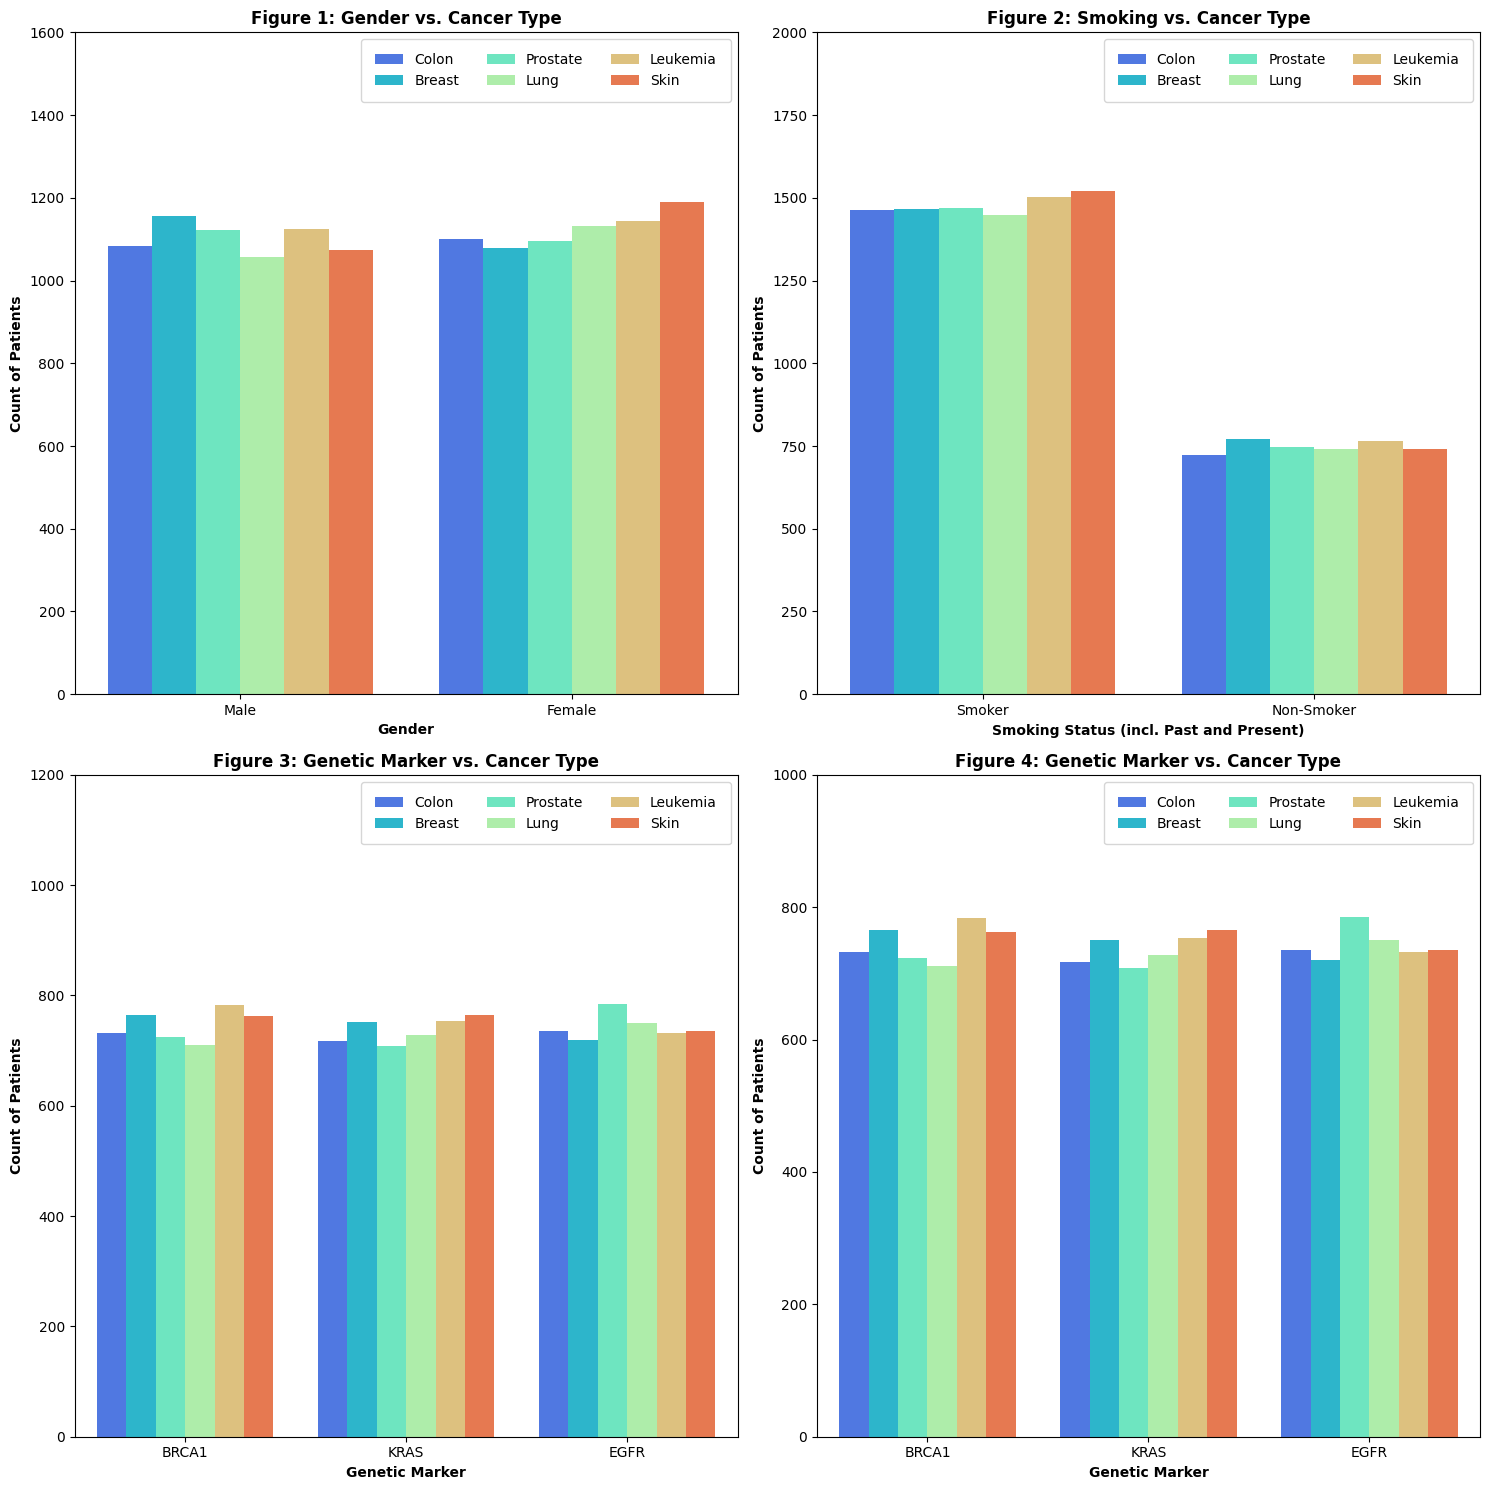

In [16]:
plt.clf() #clear figure
fig, axes = plt.subplots(2,2, figsize=(15,15)) #4 plots in 10in x 10in frame
axes = axes.flatten() #creates single numerical index for addressing all chart locations

#chart 1: Gender vs. Cancer Type
sns.countplot(cl_data, x = 'Gender', hue ='CancerType', ax=axes[0], palette = 'rainbow')
axes[0].set_title('Figure 1: Gender vs. Cancer Type', fontweight='bold')
axes[0].set_xlabel('Gender', fontweight='bold')
axes[0].set_ylabel('Count of Patients', fontweight='bold')
axes[0].legend(borderpad=1, loc='upper right', markerscale=.3, ncol=3)
axes[0].set_ylim(0,1600)

#chart 1: Smoking vs. Cancer Type
sns.countplot(cl_data, x='Smoke_Comp', hue='CancerType', ax=axes[1], palette = 'rainbow') #Using the updated smoking data to combine past and present smokers
axes[1].set_title('Figure 2: Smoking vs. Cancer Type', fontweight='bold')
axes[1].set_xlabel('Smoking Status (incl. Past and Present)', fontweight='bold')
axes[1].set_ylabel('Count of Patients', fontweight='bold')
axes[1].legend(borderpad=1, loc='upper right', markerscale=.3, ncol=3)
axes[1].set_ylim(0, 2000)

sns.countplot(cl_data, x='GeneticMarker', hue='CancerType', ax=axes[2], palette='rainbow')
axes[2].set_title('Figure 3: Genetic Marker vs. Cancer Type', fontweight='bold')
axes[2].set_xlabel('Genetic Marker', fontweight='bold')
axes[2].set_ylabel('Count of Patients', fontweight='bold')
axes[2].legend(borderpad=1, loc='upper right', ncol=3, markerscale=.3)
axes[2].set_ylim(0,1200)

sns.countplot(cl_data, x='GeneticMarker', hue='CancerType', ax=axes[3], palette='rainbow')
axes[3].set_title('Figure 4: Genetic Marker vs. Cancer Type', fontweight='bold')
axes[3].set_xlabel('Genetic Marker', fontweight='bold')
axes[3].set_ylabel('Count of Patients', fontweight='bold')
axes[3].legend(borderpad=1, loc='upper right', ncol=3, markerscale=.3)
axes[3].set_ylim(0, 1000)
plt.tight_layout()
plt.show()

# 5. Correlation Mapping (Numeric Values Only)
* This is not directly related to the Cancer Type investigation, but first just understanding if any of the numeric variables have any clear linear relationships



Index(['PatientID', 'Age', 'BMI', 'TumorSize', 'SurvivalMonths'], dtype='object')


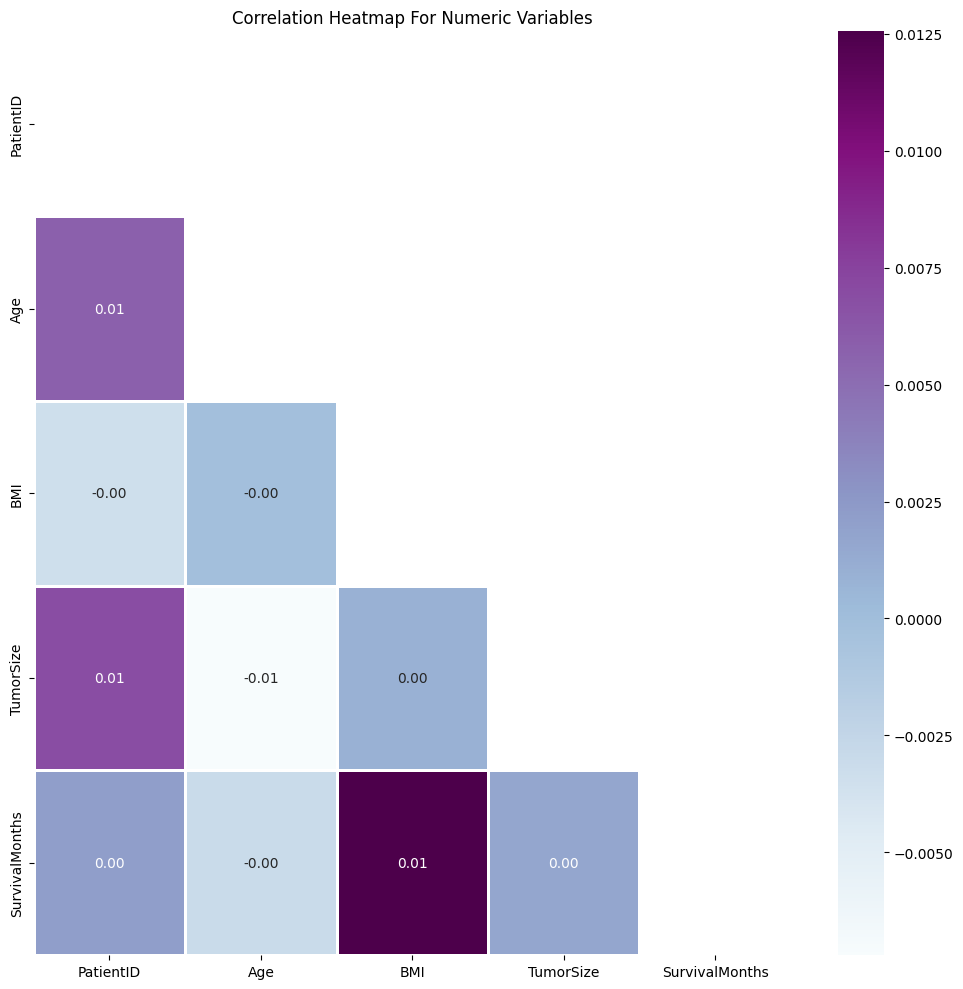

In [17]:
#A quick scatter matrix shows that there is no real linear relationship between the numeric variables
cl_data_numeric = cl_data.select_dtypes(include=['number'])
categories = cl_data_numeric.columns
print(categories)

#I don't prefer the visuals from this method
#plots = pd.plotting.scatter_matrix(cl_data_numeric,diagonal='kde',figsize=(10,10))

plt.figure(figsize=(10, 10))

correlation_matrix = cl_data_numeric.corr()
matrix_mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True,cmap='BuPu',fmt='.2f',linecolor='white',linewidth=1,mask=matrix_mask)

plt.title('Correlation Heatmap For Numeric Variables')
plt.tight_layout()
plt.show()

# 6. Further searching for significant relationships
* Rather than searching through each category, I used a loop to sort through each of the crosstabs to look for relationships between the different categories
* The 3 additional I will investigate are:
    * Recurrence vs BMI
    * TumorSize vs Smoke_Comp
    * SurvivalMonths vs Smoke_Comp
    * Smoke_Comp vs TreatmentResponse


In [18]:
results = {}
no_id_df = cl_data.drop(columns='PatientID')
columns = no_id_df.columns

for i, col1 in enumerate(columns):
    for col2 in columns[(i+1):]:

        ct = pd.crosstab(no_id_df[col1], no_id_df[col2])
        proportions = ct.div(ct.sum(axis=1), axis=0)
        
        sig_rows = proportions[proportions >=.65].dropna(how='all').stack()

        if not sig_rows.empty:
            results[f'{col1} vs {col2}'] = sig_rows

for pair, sig_rows in results.items():
    print(f"\nSignificant categories for {pair}:")



Significant categories for Age vs Smoke_Comp:

Significant categories for Gender vs Smoke_Comp:

Significant categories for Race/Ethnicity vs Smoke_Comp:

Significant categories for BMI vs FamilyHistory:

Significant categories for BMI vs Recurrence:

Significant categories for BMI vs Smoke_Comp:

Significant categories for SmokingStatus vs Smoke_Comp:

Significant categories for FamilyHistory vs Smoke_Comp:

Significant categories for CancerType vs Smoke_Comp:

Significant categories for Stage vs Smoke_Comp:

Significant categories for TumorSize vs Smoke_Comp:

Significant categories for TreatmentType vs Smoke_Comp:

Significant categories for TreatmentResponse vs Smoke_Comp:

Significant categories for SurvivalMonths vs Smoke_Comp:

Significant categories for Recurrence vs Smoke_Comp:

Significant categories for GeneticMarker vs Smoke_Comp:

Significant categories for HospitalRegion vs Smoke_Comp:


# 7. Four Additional Exploration Charts
* (x vs y orientation)
    * Recurrence vs BMI
    * TumorSize vs Smoke_Comp
    * SurvivalMonths vs Smoke_Comp
    * ~~Smoke_Comp vs TreatmentResponse~~ Cannot kdeplot 2 categorical data points, will cover in final exercise

<Figure size 640x480 with 0 Axes>

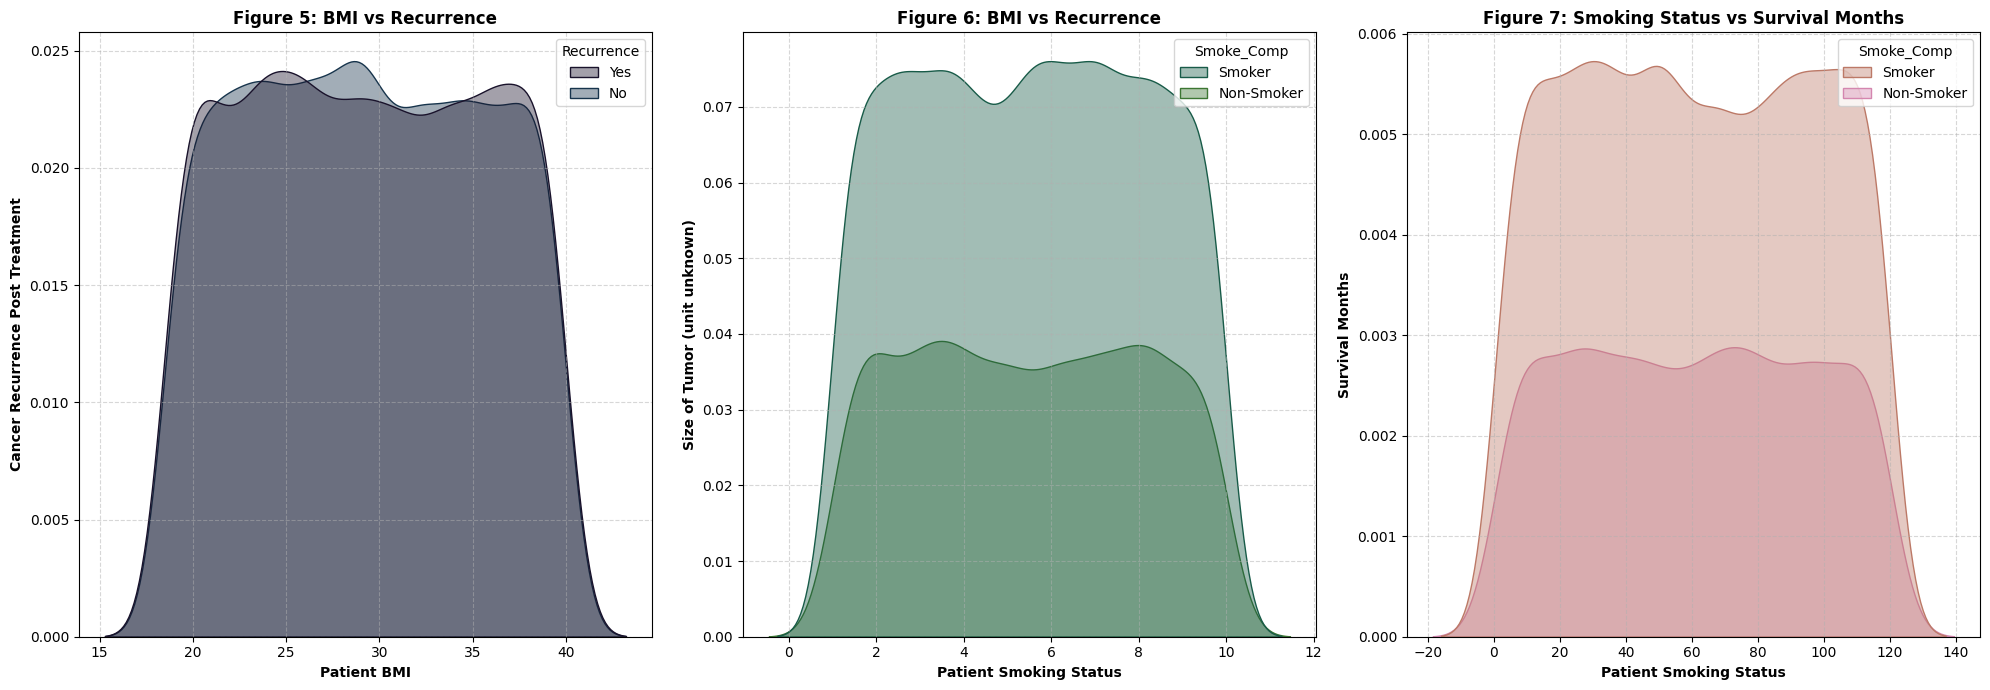

In [19]:
plt.clf()

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten() #just learned .ravel() will accomplish the same but with a view instead of copy if possible - more memory efficient
palette = sns.color_palette("cubehelix", n_colors=10)

#I tried to use countplot and box and whisker for this application, but differences were too granular. 
#Therefore, we'll use kdeplot, which will show the variations more clearly (note: this does turn this into a probability density curve)

sns.kdeplot(cl_data,x='BMI',hue='Recurrence',fill=True, alpha=.4, palette=[palette[0], palette[1]], ax=axes[0])
axes[0].set_title('Figure 5: BMI vs Recurrence', fontweight='bold')
axes[0].set_xlabel('Patient BMI', fontweight='bold')
axes[0].set_ylabel('Cancer Recurrence Post Treatment', fontweight='bold')
axes[0].grid(visible=True,axis='both',linestyle='--',alpha=.5)

sns.kdeplot(cl_data,x='TumorSize',hue='Smoke_Comp',fill=True, alpha=.4, palette=[palette[2], palette[3]], ax=axes[1])
axes[1].set_title('Figure 6: BMI vs Recurrence', fontweight='bold')
axes[1].set_xlabel('Patient Smoking Status', fontweight='bold')
axes[1].set_ylabel('Size of Tumor (unit unknown)', fontweight='bold')
axes[1].grid(visible=True,axis='both',linestyle='--',alpha=.5)

sns.kdeplot(cl_data, x='SurvivalMonths', hue='Smoke_Comp', fill=True, alpha=.4, palette=[palette[5], palette[6]], ax=axes[2])
axes[2].set_title('Figure 7: Smoking Status vs Survival Months', fontweight='bold')
axes[2].set_xlabel('Patient Smoking Status', fontweight='bold')
axes[2].set_ylabel('Survival Months', fontweight='bold')
axes[2].grid(visible=True, axis='both', linestyle='--', alpha=.5)

plt.tight_layout()
plt.show()

# 8. Grouping Analysis by Cancer Type and Recurrence
* For this stop, the short explanation is I want to do something and I'm not sure if I'm doing it right
* Therefore I will apply some simple methodology and measure the results with clear practicality

## Hypothesis Framework
* Current Limitation: Statistical correlation / independence testing only allows for comparison of 2 variables at a time when researching categorical factors
* Hypothesis: Some combinations (of variable count thereof) will show higher levels of specific cancer, remission success, etc. when grouped in a clear way
* Note: I know this IN NO WAY proves a CAUSAL link, but it does provide indications that would be researched further

## Goal
* Create a grouping methodology that shows the top candidates for further combination research when using 2, 3, 4 categorical variables in comparison with specific outcome variables (e.g. GeneticMarker + TreatmentType vs. Recurrence

In [20]:
#The first step is to sort the data in the specific column order that we want to work with (not all columns will be used for this)
sorted_df = cl_data[['Gender', 'Race/Ethnicity', 'SmokingStatus', 'FamilyHistory', 'CancerType', 'TreatmentType', 'GeneticMarker', 'HospitalRegion']]
#leave out the target items, like SurvivalMonths and Recurrence and TreatmentResponse


#First we will focuse on Average Survival Months
col_combo = list(itertools.combinations(sorted_df.columns, 2))
# for combo in col_combo:
#     print(combo)

subsets = [cl_data[list(combo)] for combo in col_combo]
param_storage = pd.DataFrame()

for i in range(len(subsets)):
    subsets[i]['SurvivalMonths'] = cl_data['SurvivalMonths']
    #print(subsets[i].head(2))
    group_cols = subsets[i].columns[:-1] #excludes the SurvivalMonths columns
    temp = subsets[i].groupby(list(group_cols)).mean('SurvivalMonths').reset_index()
    tempmax = temp.sort_values(by='SurvivalMonths', ascending=False).head(1)
    param_storage = pd.concat([param_storage, pd.DataFrame(tempmax)], ignore_index=True)
    #print(tempmax)

param_storage = param_storage.sort_values(by='SurvivalMonths', ascending=False)
print(param_storage.head(10))
#for subset in subsets 

# test = cl_data[['Gender', 'Race/Ethnicity', 'SurvivalMonths']].groupby(['Gender', 'Race/Ethnicity']).mean('SurvivalMonths').reset_index()
# print(test)

   Gender    Race/Ethnicity  SurvivalMonths  SmokingStatus FamilyHistory  \
9     NaN  African American       63.917031            NaN           NaN   
10    NaN  African American       63.789555            NaN           NaN   
24    NaN               NaN       63.380259            NaN           NaN   
17    NaN               NaN       63.247489     Non-Smoker           NaN   
14    NaN               NaN       63.115846  Former Smoker           NaN   
12    NaN             Asian       62.819549            NaN           NaN   
26    NaN               NaN       62.402861            NaN           NaN   
7     NaN          Hispanic       62.396514  Former Smoker           NaN   
3    Male               NaN       62.340536            NaN           NaN   
25    NaN               NaN       62.271650            NaN           NaN   

   CancerType        TreatmentType GeneticMarker HospitalRegion  
9    Prostate                  NaN           NaN            NaN  
10        NaN  Combination Ther